# Shrinkage Filtering Visualizations

In [1]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [12]:
data = pd.read_csv("INV_ADJ_ANAL.csv")

In [20]:
DDD = []

def create_dropdown(opts, caption='Col:'):
    dropdown = widgets.Dropdown(
        options=opts,
        value='-',
        description=caption,
        disabled=False,
    )
    dropdown.observe(on_dropdown_change, names='value')
    dropdown.ind = None
    return dropdown

def on_dropdown_change(change):
    for i, dd in enumerate(DDD):
        dd.ind = i
    if change['owner'].ind % 2:
        #VAL SELECTORS
        if change['new'] != '-':
            if change['owner'].ind == len(DDD)-1:
                opts = ['-'] + [q for q in data.columns]
                new_dropdown = create_dropdown(opts)
                display(new_dropdown)
                DDD.append(new_dropdown)
        else:
            pass
    else:
        #COL SELECTORS
        if change['new'] != '-':
            opts = ['-'] + data[change.new].unique().tolist()
            new_dropdown = create_dropdown(opts, 'Val:')
            display(new_dropdown)
            DDD.append(new_dropdown)
        else:
            DDD[change['owner'].ind + 1].close()
            del DDD[change['owner'].ind + 1]
            if change['owner'].ind != len(DDD)-1:
                DDD[change['owner'].ind].close()
                del DDD[change['owner'].ind]

def create_visual(feature, data):
    sns.scatterplot(x = data["PERIOD"], y = data["TY_QTY"], hue = feature, data = data)
    title = f"shrinkage vs year period"
    plt.title(title)
    plt.xlabel("year period")
    plt.ylabel(f"Shrikage quantity")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation='vertical')
    plt.show()
               

# Create the initial dropdown and display it
initial_dropdown = create_dropdown(opts = ['-'] + [q for q in data.columns])
DDD.append(initial_dropdown)

display(initial_dropdown)

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

Dropdown(description='Val:', options=('-', 14100, 4100, 9300, 5304, 5102, 13100, 2301, 2500, 13307, 13306, 153…

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

Dropdown(description='Val:', options=('-', 'Surveys', 'Shrink', 'All Other', 'Reconciliation'), value='-')

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

Dropdown(description='Val:', options=('-', 'Consumables', 'Softlines', 'Hardlines', 'Comm Military', 'NON-RMS'…

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

Dropdown(description='Val:', options=('-', 2023, 2024, 2022), value='-')

Dropdown(description='Col:', options=('-', 'COMMAND_CD', 'SITE_ID', 'ADJUSTMENT_CATEGORY', 'DESCRIPTION', 'DIV…

In [22]:
dcopy = data
last = None
cond = True
for i, v in enumerate(DDD):
    if i % 2:
        cond &= (dcopy[last] == v.value)
    else:
        last = v.value
dcopy[cond]

,COMMAND_CD,SITE_ID,ADJUSTMENT_CATEGORY,DESCRIPTION,DIVISION,LOB_DESC,DEPT_DESC,CLASS,SUB_CLASS,MERCHANDISING_YEAR,MERCHANDISING_PERIOD,PERIOD,TY_QTY,TY_VALUE,LY_QTY2,LY_VALUE2,LM_QTY3,LM_VALUE3
173720,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Personal Care,PERSNL CARE ELECTRIC,1300 - ORAL HYGIENE,1301 - TOOTHBRUSHES,2023,1,2023-01,-1,(47.99),-,-,-,-
173727,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Hardware,GENERAL HARDWARE,1200 - LIGHT BULBS,1201 - INCANDESCENT,2023,1,2023-01,-2,(5.98),-,-,-,-
173927,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Food,DRY GROCERY,1500 - NUTS & SEEDS,1501 - NUTS,2023,1,2023-01,-1,(0.89),-,-,-,-
174602,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Non Alcoholic Bev,NON-ALCOHOLIC BEVERAGES,1100 - CSD,1104 - 20OZ FLAVORED REG,2023,1,2023-01,-20,(39.80),-,-,-,-
174693,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Wine,WINE,2100 - POPULAR,2110 - MOSCATO,2023,1,2023-01,0,-,-,-,(1.00),(9.99)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450659,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Cosmetics,BATH AND BODY,5900 - COCOA BROWN,5901 - BODY,2023,12,2023-12,0,-,(1.00),(4.94),-,-
450859,PNM,14100,Shrink,301-CYCLE COUNT,Consumables,Stationery,GREETING CARDS,1000 - GREETING CARDS,1003 - WEDDING/ANNIVERSARY,2023,12,2023-12,0,-,-,-,(2.00),(5.78)
450936,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Cosmetics,PRESTIGE FRAGRANCE,1000 - HFC PRESTIGE,1007 - FRAGRANCE MEN,2023,12,2023-12,0,-,(1.00),(53.00),-,-
451894,PNM,14100,Shrink,300-ON HAND CORRECTION,Consumables,Food,GOURMET FOOD/CANDY,1100 - HOLIDAY GOURMET,1101 - HOLIDAY GOURMET,2023,12,2023-12,0,-,-,-,(11.00),(26.89)


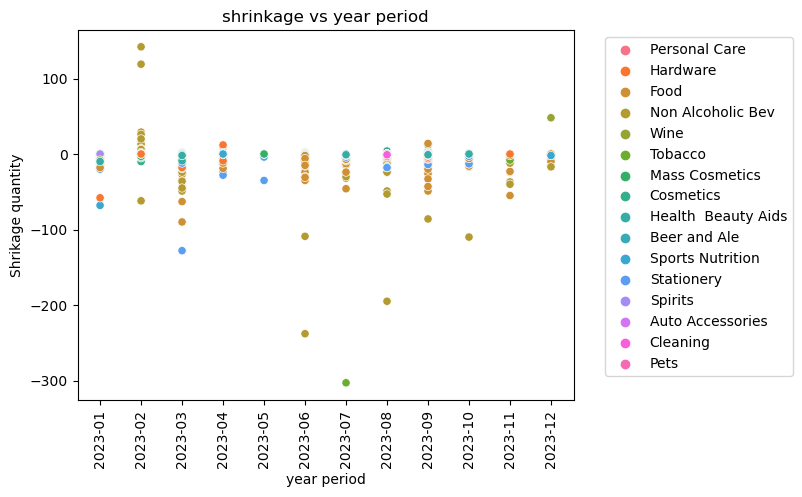

In [24]:
filtered_data = dcopy[cond]
create_visual(filtered_data["LOB_DESC"], filtered_data)